# Netflix Audience Views

## 1. Data info

In [18]:
import pandas as pd
import numpy as np
import datetime

In [19]:
df = pd.read_csv("vodclickstream_uk_movies_03.csv")
df

,Unnamed: 0,datetime,duration,title,genres,release_date,movie_id,user_id
0,58773,2017-01-01 01:15:09,0.0,"Angus, Thongs and Perfect Snogging","Comedy, Drama, Romance",2008-07-25,26bd5987e8,1dea19f6fe
1,58774,2017-01-01 13:56:02,0.0,The Curse of Sleeping Beauty,"Fantasy, Horror, Mystery, Thriller",2016-06-02,f26ed2675e,544dcbc510
2,58775,2017-01-01 15:17:47,10530.0,London Has Fallen,"Action, Thriller",2016-03-04,f77e500e7a,7cbcc791bf
3,58776,2017-01-01 16:04:13,49.0,Vendetta,"Action, Drama",2015-06-12,c74aec7673,ebf43c36b6
4,58777,2017-01-01 19:16:37,0.0,The SpongeBob SquarePants Movie,"Animation, Action, Adventure, Comedy, Family, ...",2004-11-19,a80d6fc2aa,a57c992287
...,...,...,...,...,...,...,...,...
671731,730504,2019-06-30 21:37:08,851.0,Oprah Presents When They See Us Now,Talk-Show,2019-06-12,43cd23f30f,57501964fd
671732,730505,2019-06-30 21:49:34,91157.0,HALO Legends,"Animation, Action, Adventure, Family, Sci-Fi",2010-02-16,febf42d55f,d4fcb079ba
671733,730506,2019-06-30 22:00:44,0.0,Pacific Rim,"Action, Adventure, Sci-Fi",2013-07-12,7b15e5ada1,4a14a2cd5a
671734,730507,2019-06-30 22:04:23,0.0,ReMastered: The Two Killings of Sam Cooke,"Documentary, Music",2019-02-08,52d49c515a,0b8163ea4b


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671736 entries, 0 to 671735
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    671736 non-null  int64  
 1   datetime      671736 non-null  object 
 2   duration      671736 non-null  float64
 3   title         671736 non-null  object 
 4   genres        671736 non-null  object 
 5   release_date  671736 non-null  object 
 6   movie_id      671736 non-null  object 
 7   user_id       671736 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 41.0+ MB


In [21]:
df.dtypes

Unnamed: 0        int64
datetime         object
duration        float64
title            object
genres           object
release_date     object
movie_id         object
user_id          object
dtype: object

## 2. User' views on each day

In [22]:
df[df["duration"]>0]
df["dt"] = pd.to_datetime(df['datetime']).dt.date
df.groupby(["user_id", "dt"])["title"].count()

user_id     dt        
00004e2862  2017-12-05    1
000052a0a0  2017-05-23    3
            2017-05-24    2
            2017-05-26    1
            2017-05-30    1
                         ..
fffeac83be  2017-09-10    1
            2017-09-18    1
            2017-09-20    1
ffff2c5f9e  2017-07-23    2
ffffd36adf  2018-10-13    1
Name: title, Length: 407739, dtype: int64

## 3. Difference between click time

In [23]:
clickdiff = df["duration"].groupby(df["user_id"]).mean()
clickdiff

user_id
00004e2862        0.000000
000052a0a0     2024.166667
000090e7c8        0.000000
000118a755       -0.250000
000296842d     9663.375000
                  ...     
fffd9bf758     8495.000000
fffe7b777b     1785.000000
fffeac83be    40606.272727
ffff2c5f9e        0.000000
ffffd36adf        0.000000
Name: duration, Length: 161918, dtype: float64

## 4. Total views of users

In [24]:
view = df["user_id"].value_counts()
view.head(10)

b15926c011    737
779343a3ea    484
89fbb087f3    278
7cdfd0e14a    207
e06f0be797    199
7c53ece165    187
322f2bd4d4    179
e259fd87b7    165
c314161c9b    156
fc565871cf    153
Name: user_id, dtype: int64

## 5. Total views per day

In [25]:
view_per_day = df.groupby('dt')["title"].count()
view_per_day

dt
2017-01-01    524
2017-01-02    509
2017-01-03    463
2017-01-04    444
2017-01-05    413
             ... 
2019-06-26    561
2019-06-27    464
2019-06-28    533
2019-06-29    817
2019-06-30    846
Name: title, Length: 911, dtype: int64

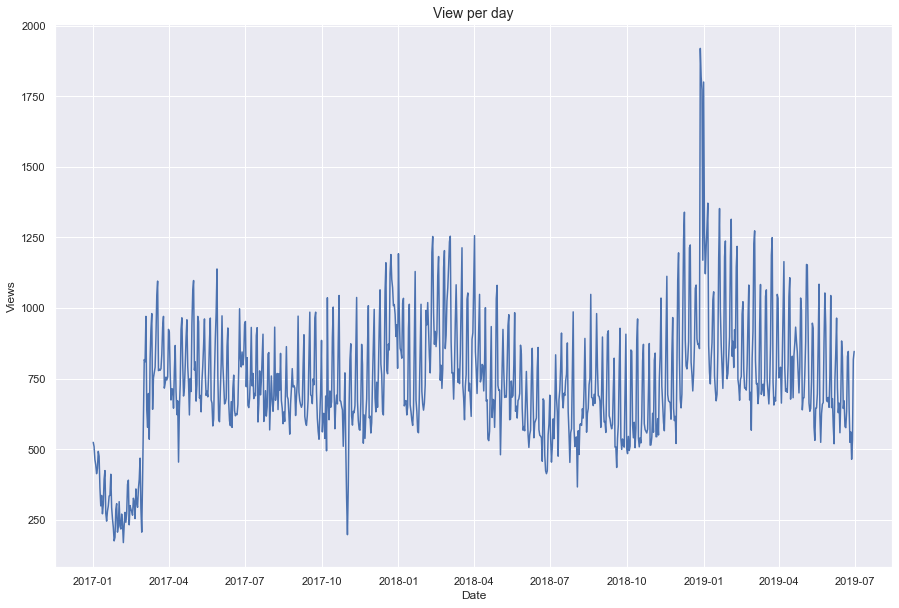

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
view_per_day.plot()
plt.title("View per day", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Views")
plt.show()

## 6. Views per movie per day

In [27]:
view = df.groupby(["dt", "title"])["user_id"].count().reset_index()
view.rename(columns = {"user_id": "view"}, inplace=True)
view

,dt,title,view
0,2017-01-01,(T)ERROR,1
1,2017-01-01,009 RE:Cyborg,1
2,2017-01-01,21 & Over,1
3,2017-01-01,28 Days,1
4,2017-01-01,3 Ninjas Kick Back,1
...,...,...,...
300218,2019-06-30,Wine Country,1
300219,2019-06-30,Wonder,3
300220,2019-06-30,X-Men: Days of Future Past,1
300221,2019-06-30,XXX: State of the Union,1


In [28]:
first = view["dt"].min()
last = view["dt"].max()

In [29]:
movie_list = view["title"].to_list()

In [30]:
import panel as pn
import altair as alt
from altair import datum
from vega_datasets import data

In [31]:
alt.renderers.enable('default')
pn.extension('vega')

In [32]:
# set a title for your dashboard
title = '## Netflix Audience Dashboard'

subtitle = 'This dashboard allows you to select a movie and date range to see the amount of views.'

# create list of company names (tickers)
tickers = movie_list

# this creates the dropdown widget
ticker = pn.widgets.Select(name='Movie', options=tickers)

# this creates the date range slider
date_range_slider = pn.widgets.DateRangeSlider(
    name='Date Range Slider',
    start=first, end=last,
    value=(first, last)
)

# tell Panel what your plot "depends" on. 
# This defines what should trigger a change in the chart.
# both values in depends() will be used in our below Altair chart as filters
@pn.depends(ticker.param.value, date_range_slider.param.value)
def get_plot(ticker, date_range): # start function

   # Load and format the data
    df = view # define df
    
    # create a date filter that uses values from the date range slider
    start_date = date_range_slider.value[0] # store the first date range slider value in a var
    end_date = date_range_slider.value[1] # store the end date in a var
    mask = (df['dt'] > start_date) & (df['dt'] <= end_date) # create filter mask for the dataframe
    df = df.loc[mask] # filter the dataframe
    
    # create the Altair chart object
    chart = alt.Chart(df).mark_area(color="#0c1944", opacity=0.8).encode(x='date', y='view', tooltip=alt.Tooltip(['date','view'])).transform_filter(
        (datum.symbol == ticker) # this ties in the filter from the dropdown selection
    )
    
    return chart


In [33]:
# create the Panel object, passing in all smaller objects
dashboard = pn.Row(
    pn.Column(title, subtitle, ticker, date_range_slider),
    get_plot(tickers, df["dt"]) # draw chart function!
)

In [34]:
dashboard.show()

Launching server at http://localhost:52507


## 7. Top 50 movies

<AxesSubplot:>

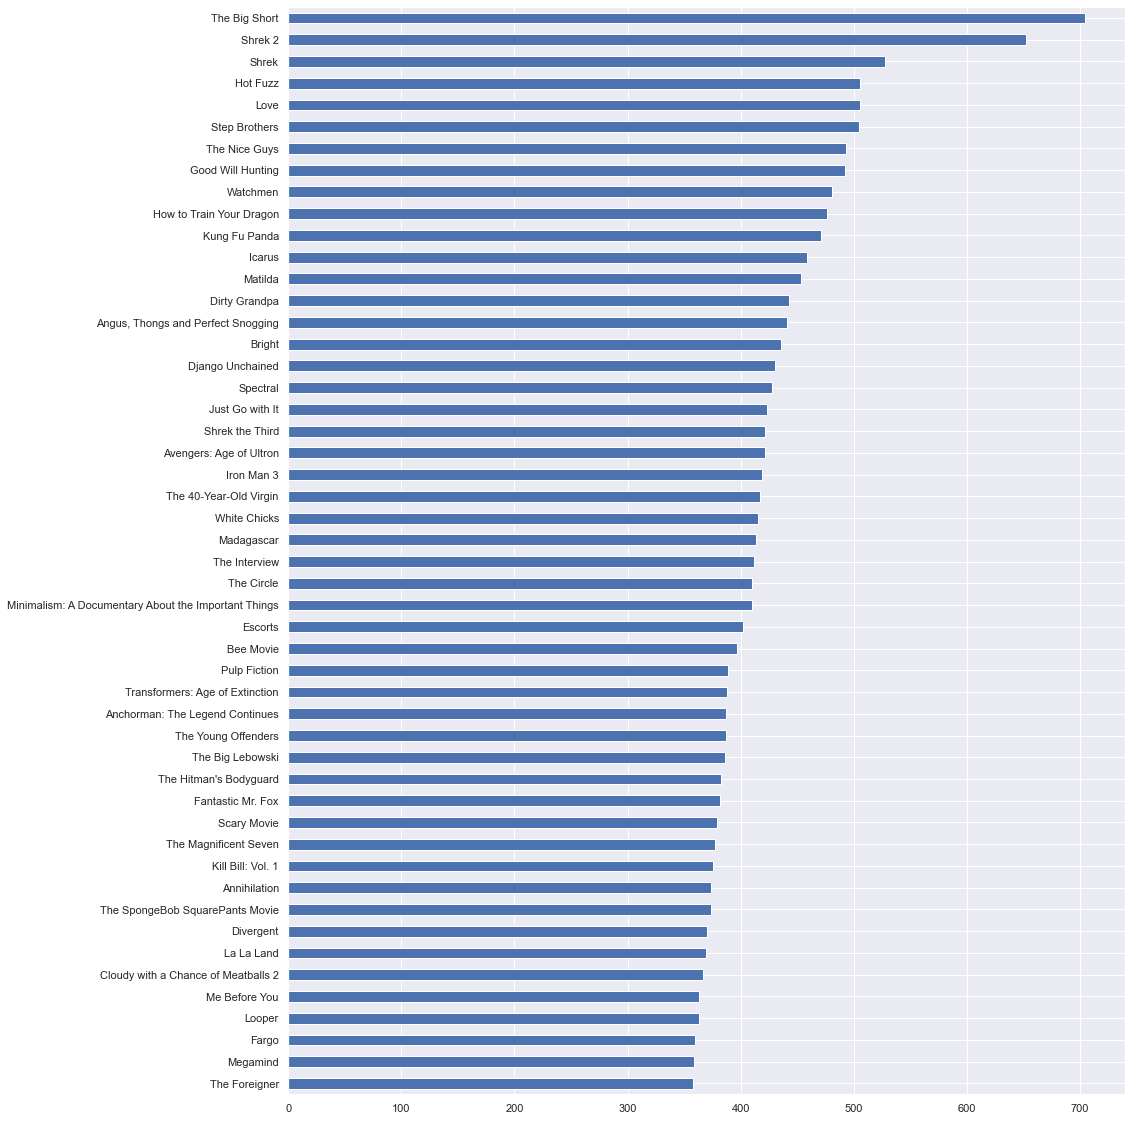

In [37]:
view["title"].value_counts().nlargest(50).sort_values().plot(kind="barh", figsize=(15,20))